In [28]:
import numpy as np
import torch
import torch.nn as nn


X = training_dataset = torch.bernoulli(torch.empty(100, 10).uniform_(0, 1))

In [20]:
#print(X)

# Loop over the number of hidden nodes and calculation of Renyi entropy

In [29]:
# cycle over the number of hidden nodes + Renyi entropy calculation
import numpy as np
import pandas as pd
from sklearn.neural_network import BernoulliRBM
import math

Renyi_entropy = []
num_counts = [] # number of hidden + visible nodes
Sh_entropy = []
Int_Energy = []

myfile = 'RBM_Renyi.csv'

with open(myfile, 'a') as file: 
    file.write('num_nodes' + ';' + 'Renyi_entropy' + ';' + '\n')

for k in range (1,10):
    n_components = k
    # we declare a model of a binary limited Boltzmann machine and train on dataset X
    # n_components - number of hidden nodes
    # number of visible nodes is the number of features in the data (number of columns).
    # In this example, the number of visible nodes = 10
    model = BernoulliRBM(n_components)
    model.fit(X)
    # vector - bias for hidden layer
    b = model.intercept_hidden_
    # vector - bias for visible layer
    a = model.intercept_visible_
    # weights matrix
    w = model.components_
    # number of visible nodes
    num_visible = len(a)
    
    # we calculate the probabilities of the model
    energy_sum = 0
    exp_energy = []
    probs = []
    icount = 0
    # loop over possible values of the visible vector from (0,0,0 ..., 0) to (1,1,1 ..., 1)
    for i in range (0, 2**(num_visible)):
        # convert to a binary representation of the desired length
        x = '{0:b}'.format(i).zfill(num_visible)
        icount = icount +1
        
        # translate the resulting string into a numpy array
        v_array = np.fromiter(x, dtype=int)
        #print(v_array)
        #print()
        
        # loop over possible values of the hidden vector
        for j in range (0, 2**(n_components)):
            # convert to a binary representation of the desired length
            y = '{0:b}'.format(j).zfill(n_components)
            #print(y)
            #print()
            
            # translate the resulting string into a numpy array
            h_array = np.fromiter(y, dtype=int)
            #print(h_array)
            
            # counting energy
            energy =  - (np.dot(a, v_array) + np.dot(b,h_array) + np.dot(h_array,(np.matmul(w, v_array))))
            exp_energy.append(math.exp(-energy))
            energy_sum = energy_sum + math.exp(-energy)
        
    # count the probabilities
    probs = [x / energy_sum for x in exp_energy]
    
    # calculate the Renyi entropy
    q = 1/(num_visible + n_components)
    thresh = 1/(2**(n_components + num_visible))

    
    High_probes = pd.DataFrame(probs)
    num_top = n_components + num_visible
    
    word_ratio = np.count_nonzero(High_probes>thresh)  
    sum_prob = High_probes[High_probes>thresh].sum()

    print('word_ratio:', word_ratio)
    print('word_ratio_proport: ', word_ratio*100/High_probes.shape[0])
    print('sum_prob: ', sum_prob)
    print('probs: ', len(probs))
    print('number of nodes: ', n_components + num_visible)
    print()
    
    Sh  = np.log(word_ratio/High_probes.shape[0])
    En = -np.log(sum_prob)
    Fen = En - Sh*num_top
    Renyi = -Fen/(1- num_top)  
    
    #Renyi = (1/(1-q))*math.log(sum([x**q for x in probs if x >= thresh]))
    
    #print(probs)
    #print()
    
    Renyi_entropy.append(Renyi)
    Sh_entropy.append(Sh)
    Int_Energy.append(En)
    num_counts.append(num_visible + n_components)
    
    with open(myfile, 'a') as file: 
            file.write(str(num_counts) + ';' + str(Renyi) + ';' + '\n')




word_ratio: 962
word_ratio_proport:  46.97265625
sum_prob:  0    0.561213
dtype: float64
probs:  2048
number of nodes:  11

word_ratio: 1929
word_ratio_proport:  47.0947265625
sum_prob:  0    0.580917
dtype: float64
probs:  4096
number of nodes:  12

word_ratio: 3896
word_ratio_proport:  47.55859375
sum_prob:  0    0.585998
dtype: float64
probs:  8192
number of nodes:  13

word_ratio: 7313
word_ratio_proport:  44.635009765625
sum_prob:  0    0.585895
dtype: float64
probs:  16384
number of nodes:  14

word_ratio: 15897
word_ratio_proport:  48.5137939453125
sum_prob:  0    0.613301
dtype: float64
probs:  32768
number of nodes:  15

word_ratio: 31334
word_ratio_proport:  47.8118896484375
sum_prob:  0    0.572432
dtype: float64
probs:  65536
number of nodes:  16

word_ratio: 63082
word_ratio_proport:  48.12774658203125
sum_prob:  0    0.593745
dtype: float64
probs:  131072
number of nodes:  17

word_ratio: 124945
word_ratio_proport:  47.66273498535156
sum_prob:  0    0.576721
dtype: float6

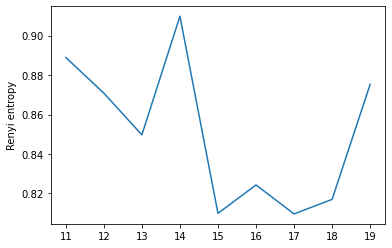

In [30]:
import matplotlib.pyplot as plot
#     Sh_entropy.append(Sh)
#    Int_Energy.append(En)
 
plot.plot(num_counts, Renyi_entropy)

plot.ylabel('Renyi entropy')
plot.show()